In [55]:
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def abc(seed=0,width=100,height=100,offset=20):
    with open('json.txt') as fs:
        data=json.load(fs)

    G=nx.Graph()

    nodes=data['nodes']
    for node in nodes:
        G.add_node(node['phone'])

    edges=data['edges']
    for edge in edges:
        G.add_edge(edge['source'],edge['target'])


    pos=nx.spring_layout(G,seed=seed)
    nx.draw(G,pos)
    pos_array=[]
    for _,d in pos.items():
        pos_array.append(d)
    pos_array=np.array(pos_array)
    xmin,ymin=pos_array.min(axis=0)

    for node in nodes:
        id=node['phone']
        x,y=pos[id]
        x,y=x-xmin,y-ymin

        node['x']=int(x*width)+offset
        node['y']=int(y*height)+offset
    return data

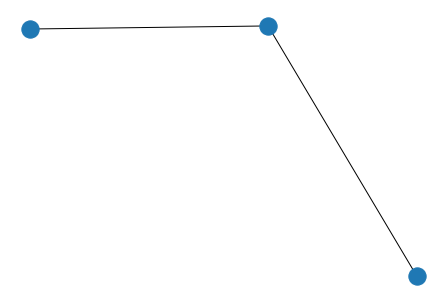

In [57]:
dd=abc()

In [58]:
x,y=[],[]
for n in dd['nodes']:
    x.append(n['x'])
    y.append(n['y'])

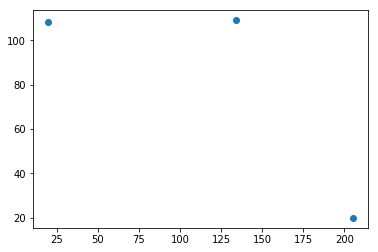

In [59]:
plt.scatter(x,y)